# PROJECT REPORT- GROUP 38

## Introduction
#### Provide some relevant background information on the topic so that someone unfamiliar with it will be prepared to  understand the rest of your proposal
  
The typical human heart beats 100,000 times every day, circulating 2,000 gallons of blood throughout the body. There are 60,000 miles of blood veins throughout our body (source: healthblog.uofmhealth).

Adults 65 years of age and older have a higher risk of developing cardiovascular disease, which is characterised by issues with the heart, blood vessels, or both. The heart and blood vessels can alter with age, which could raise a person's risk of cardiovascular disease (source: National Institute on Aging).

Blood pressure is an essential measure of cardiovascular health, along with heart rate. High blood pressure, which is medically known as hypertension, is associated with a number of cardiovascular disorders and diseases, including heart disease (source: Public Health England Guidance).

A person's risk of heart disease can double if they have high cholesterol. This is due to the fact that high cholesterol can accumulate in artery walls, reducing blood flow to the heart, brain, kidneys, and other organs, as well as the legs (source: National Center for Chronic Disease Prevention and Health Promotion).
#### Clearly state the question you will try to answer with your project
  
How do age, blood pressure, heart rate, and cholesterol affect the risk of developing heart disease? 


#### Identify and describe the dataset that will be used to answer the question 


To answer those questions, we will use the heart disease multivariate dataset, which contains 4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach. It means the heart disease data for those locations. All of the data has 14 variables: 

- age: The person’s age in years

- sex: The person’s sex (1 = male, 0 = female)

- cp: chest pain type (1 = typical angina, 2 = atypical angina, 3 = non-anginal pain, 4 = asymptomatic)

- trestbps : The person’s resting blood pressure (mm Hg on admission to the hospital) *resting blood pressure means the blood pressure of person after sitting quietly.

- chol: serum cholesterol (in mg/dl)

- fbs: fasting blood sugar (>120 mg/dl,  1 = true, 0 = false)

- restecg: resting electrocardiographic results
  
  Value 0: normal

  Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

  Value 2: showing probable or definite left ventricular hypertrophy by Estes’ criteria
  
- thalach: maximum heart rate achieved

- exang: exercise included angina (1 = yes, 2 = no)

- oldpeak: ST depression induced by exercise relative to rest.

- slope: the slope of the peak exercise ST segment

- ca: The number of major vessels (0 - 3)

- thal: A blood disorder calles thalassemia

  Value 0: NULL

  Value 1: fixed defect (no blood flow in some part of heart)

  Value 2: normal blood flow

  Value 3: reversible defect (a blood flow is observed but it is not normal)

- num: diagnosis of heart disease (0 = no, 1 = yes)

From all the variables above, we will predict num (diagnosis of heart disease) with predictors: age, trestbps, chol, and thalach.



### reading the data from the web

In [14]:
library(repr)
library(tidyverse)
library(tidymodels)

Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_co

In [15]:
cleveland_url <- "https://github.com/charlie-carter/dsci100project/raw/main/data/processed.cleveland.data"
hungarian_url <- "https://github.com/charlie-carter/dsci100project/raw/main/data/processed.hungarian.data"
switzerland_url <- "https://github.com/charlie-carter/dsci100project/raw/main/data/processed.switzerland.data"
va_url <- "https://github.com/charlie-carter/dsci100project/raw/main/data/processed.va.data"

column_names = c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", 
                 "exang", "oldpeak", "slope", "ca", "thal", "num")

cleveland_data <- read.table(cleveland_url, sep = ",", col.names = column_names)
switzerland_data <- read.table(switzerland_url, sep = ",", col.names = column_names)
hungarian_data <- read.table(hungarian_url, sep = ",", col.names = column_names)
va_data <- read.table(va_url, sep = ",", col.names = column_names)

In [16]:
combined_data <- cleveland_data |>
        rbind(switzerland_data) |>
        rbind(hungarian_data) |>
        rbind(va_data)

head(combined_data)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>
1,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
2,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
3,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
4,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
5,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
6,56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0


**Clean and tidy the data**

In [26]:
# predictors are age, trestbps, chol, thalach
# target is diagnosis based on num
no_missing_value_data <- combined_data |> 
    filter(age != "?" & trestbps != "?" & chol != "?" & thalach != "?" & num != "?")

data <- no_missing_value_data |>
    select(age, trestbps, chol, thalach, num) |>
    mutate(age = as.integer(age)) |>
    mutate(trestbps = as.integer(trestbps)) |>
    mutate(chol = as.integer(chol)) |>
    mutate(thalach = as.integer(chol)) |>
    mutate(diagnosis = as_factor(ifelse(num == 0, "healthy", "sick"))) |>
    select(-num)
head(arrange(data, desc(chol)))

,age,trestbps,chol,thalach,diagnosis
,<int>,<int>,<int>,<int>,<fct>
1,54,130,603,603,sick
2,67,115,564,564,healthy
3,32,118,529,529,sick
4,53,145,518,518,sick
5,44,135,491,491,sick
6,53,113,468,468,healthy


In [24]:
## splitting the data
set.seed(3456)

data_split <- initial_split(data, prop = 0.75, strata = diagnosis)
training_data <- training(data_split)
testing_data <- testing(data_split)

## Tables

In [25]:
means <- training_data |> 
    select(age, trestbps, chol, thalach) |>
    map_df(mean) |>
    mutate(average_age = age) |>
    mutate(average_trestbps = trestbps) |>
    mutate(average_chol = chol) |>
    mutate(average_thalach = thalach) |>
    select(average_age, average_trestbps, average_chol, average_thalach)
means

average_age,average_trestbps,average_chol,average_thalach
<dbl>,<dbl>,<dbl>,<dbl>
53.02404,131.5064,199.0128,199.0128


## Visualizations
- Age distribution

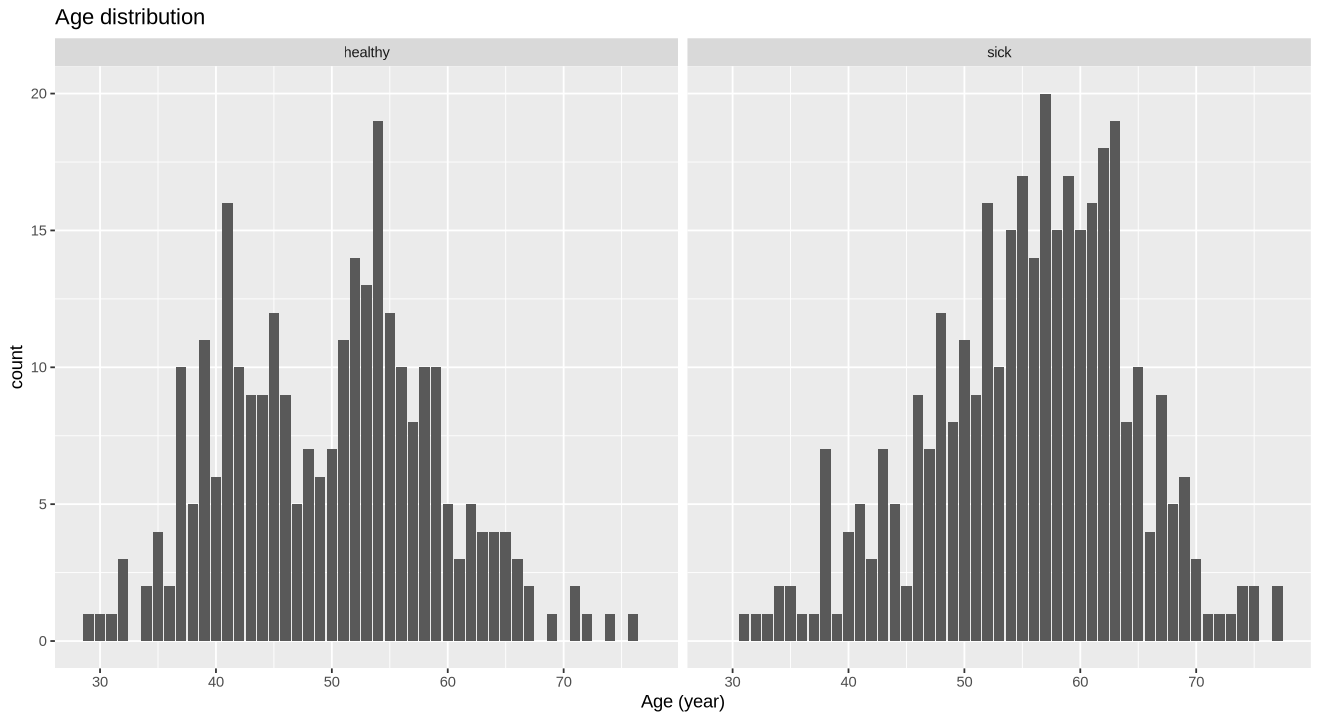

In [9]:
options(repr.plot.width = 11, repr.plot.height = 6) 
age_plot <- ggplot(training_data, aes(x = age)) +
    geom_bar() +
    facet_grid(cols = vars(diagnosis)) +
    ggtitle("Age distribution") +
    xlab("Age (year)")

age_plot

- Blood pressure 

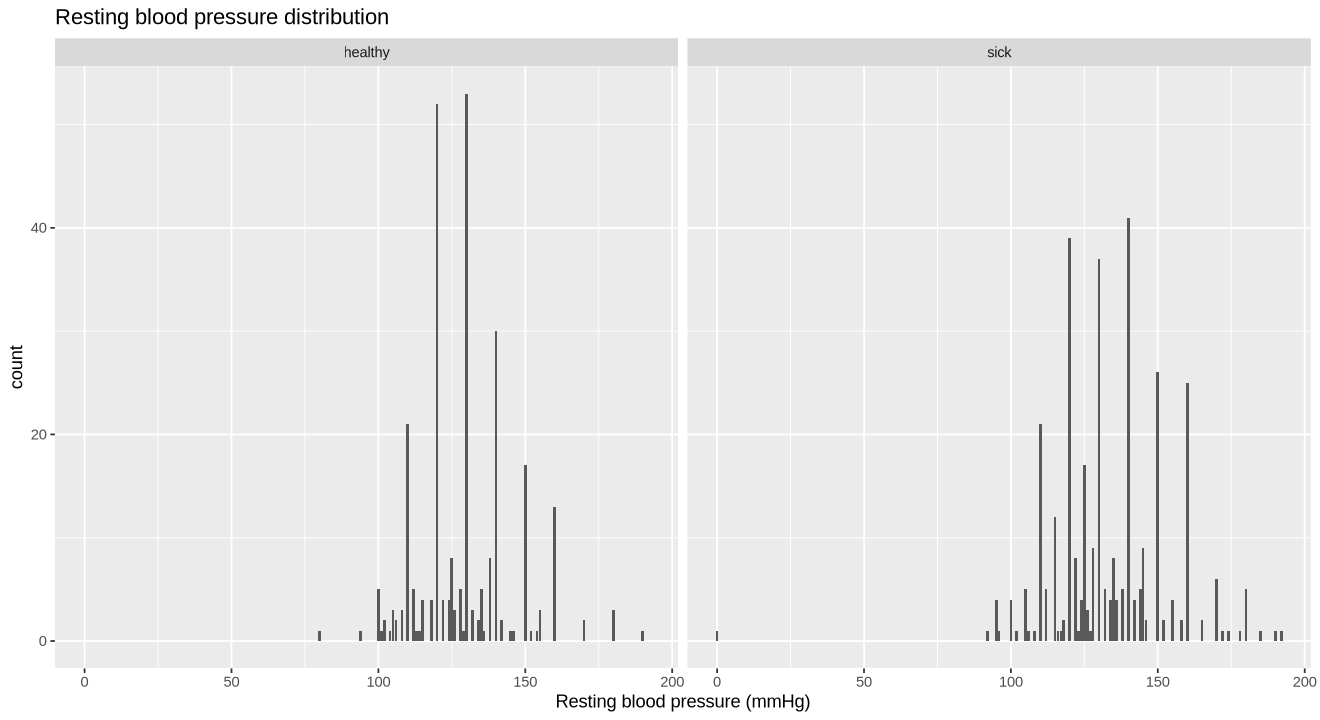

In [10]:
blood_pressure_plot <- ggplot(training_data, aes(x = trestbps)) +
    geom_bar() +
    facet_grid(cols = vars(diagnosis)) +
    ggtitle("Resting blood pressure distribution") +
    xlab("Resting blood pressure (mmHg)")

blood_pressure_plot

- Cholesterol distribution

#### NOTE:
from this plot, we see that there are a lot of observation with 0 mm/dl, which is highly unlikely biologically, and might be a data collection error.

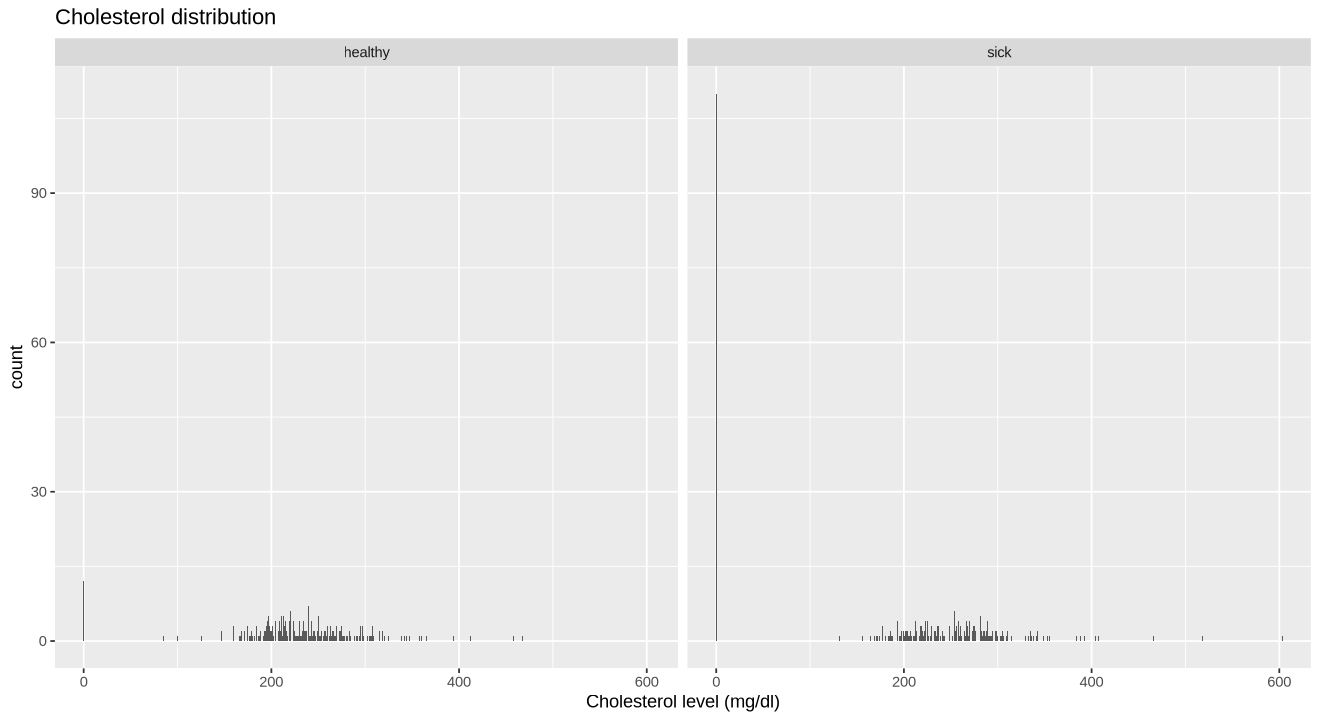

In [14]:
chol_plot <- ggplot(training_data, aes(x = chol)) +
    geom_bar() +
    facet_grid(cols = vars(diagnosis)) +
    ggtitle("Cholesterol distribution") +
    xlab("Cholesterol level (mg/dl)")

chol_plot

- Maximum heart rate plot

### NOTE:
from this plot, we see that there are a lot of observation with 0 heart rate, which is biologically impossible, which means that it may be a data collection error.

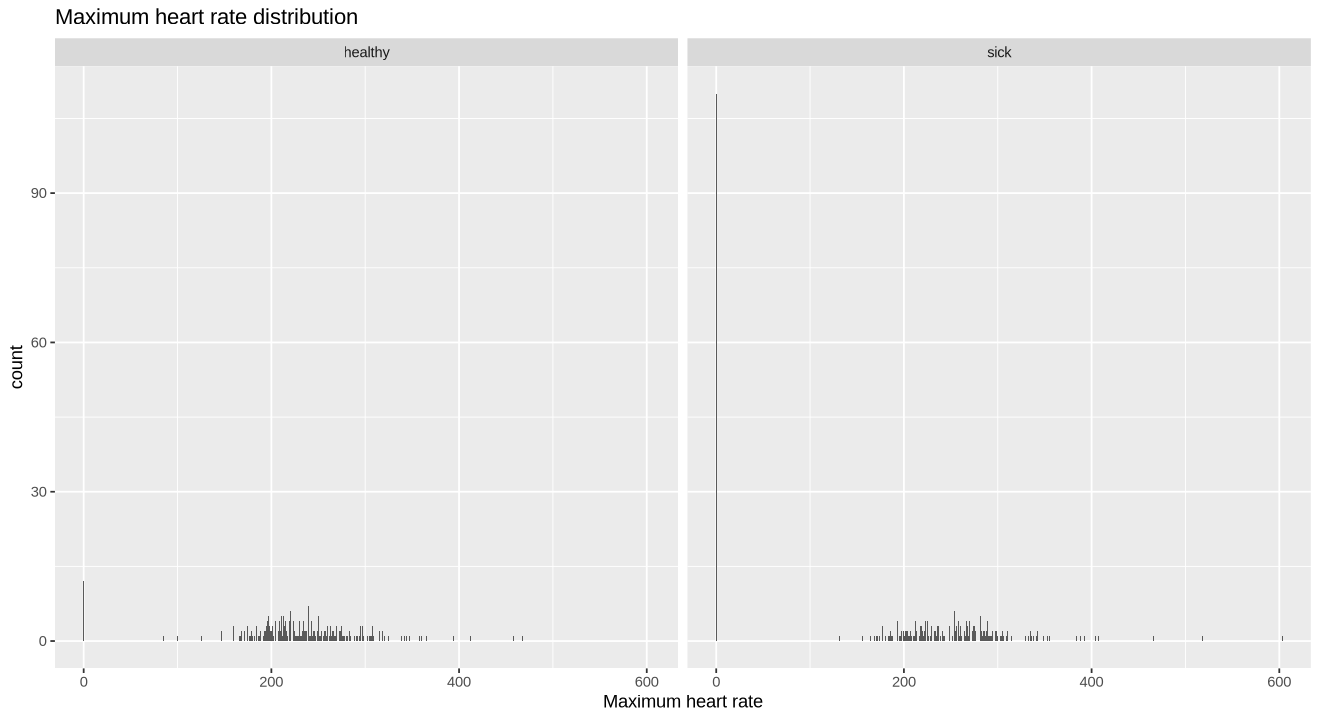

In [15]:
heart_rate_plot <- ggplot(training_data, aes(x = thalach)) +
    geom_bar() +
    facet_grid(cols = vars(diagnosis)) +
    ggtitle("Maximum heart rate distribution") +
    xlab("Maximum heart rate")
heart_rate_plot

- Diagnosis plot

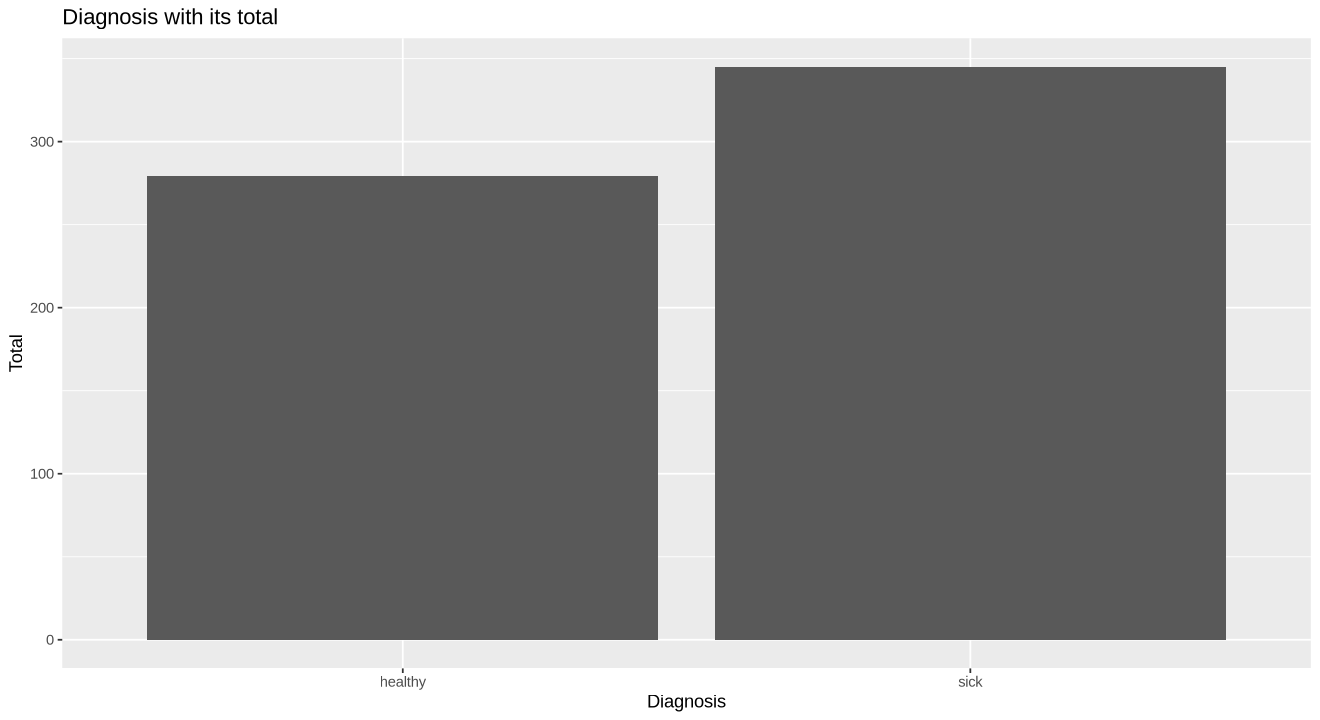

In [18]:
diagnosis_plot <- ggplot(training_data, aes(x = diagnosis)) +
    geom_bar() +
    ggtitle("Diagnosis with its total") +
    xlab("Diagnosis") +
    ylab("Total")
diagnosis_plot

## Classification Model:

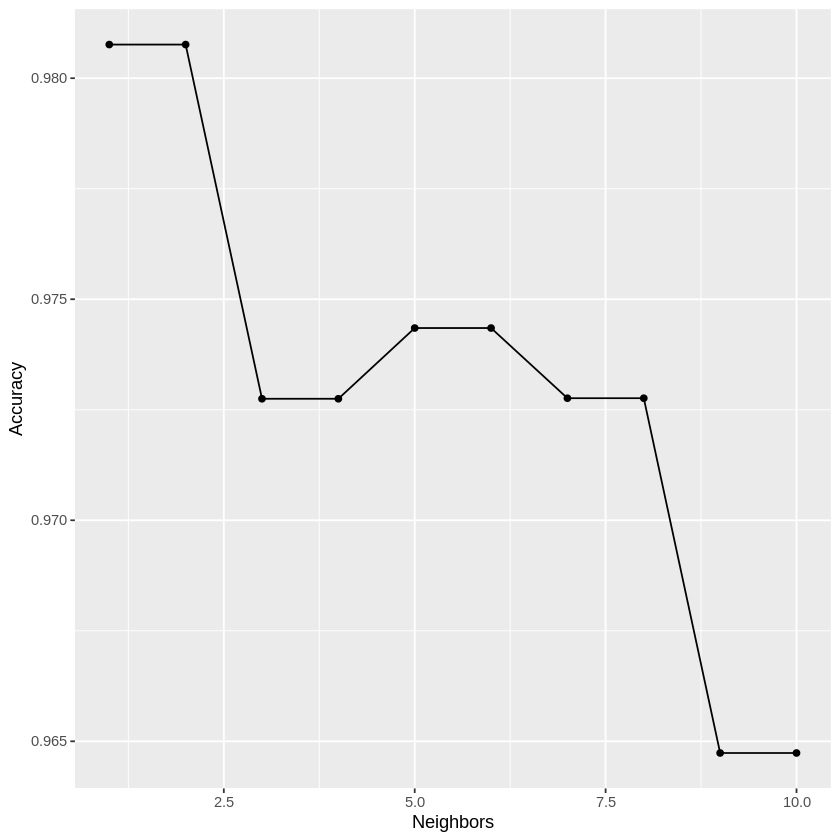

In [32]:
set.seed(1234) 

training_recipe <- recipe(diagnosis ~., data = training_data) |>
    step_center(all_predictors()) |>
    step_scale(all_predictors())

heart_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")

training_vfold <- vfold_cv(training_data, v = 5, strata = diagnosis)

values <- tibble(neighbors = seq(from = 1, to = 10, by = 1))

tuned_workflow <- workflow() |>
    add_recipe(training_recipe) |>
    add_model(heart_spec) |>
    tune_grid(resamples = training_vfold, grid = values) |>
    collect_metrics() 

tuned_workflow <- tuned_workflow |>
    filter(.metric == "accuracy")

cross_val_plot <- ggplot(tuned_workflow, aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    xlab("Neighbors") +
    ylab("Accuracy")

cross_val_plot

## Methods:

#### How you will conduct either your data analysis:
Our data analysis will be done with the end goal of using K-nearest neighbours classication to predict the diagnosis of a patient based on certain patient vitals and data. Our classification will be done with the following columns: age (age), resting heart rate (trestbps), max heart rate (thalach), and cholesterol (chol) level. 

#### Describe at least one way that you will visualize the results
We will use scatterplots to compare two variables at a time, and colour the points based on diagnosis. This will give us a general idea of what categories influence diagnosis the most. 

## Expected outcomes and significance:


#### What do you expect to find?

We expect to predict the diagnosis of heart disease by a person with a given age, blood pressure, heart rate, and cholesterol. We expect our prediction to be fairly accurate which would be indicated by a strong, direct relationship between the predictors and target variables. 

We expect that an older patient, with higher levels of cholesterol and blood pressure would be more prone to developing heart disease - supported by the logic discussed in the Introduction. 


#### What impact could such findings have?

The higher the accuracy of the findings, the more beneficial it is to the health sector. The findings can be used by health professionals such as doctors and researchers to accurately diagnose patients, or predict potential lifestyle choices that directly develop the risk factors.   It is important to consider, however, that the findings are not fully accurate but work in supporting the advancement of the medical system. 


#### What future questions could this lead to?

- What leads to high levels of cholesterol and blood pressure?

- Is heart disease more likely to develop because of genetics or the environment? Or a combination of both? In what ratio?

- Are there other risk factors that accelerate the development of heart disease? 



Bibliography

Watson, S. Amazing Facts About Heart Health and Heart Disease. WebMD. https://www.webmd.com/heart/features/amazing-facts-about-heart-health-and-heart-disease_.

National Institute of Aging. Heart Health and Aging. National Institute on Aging. https://www.nia.nih.gov/health/heart-health/heart-health-and-aging#:~:text=Adults%20age%2065%20and%20older.

Public Health England. Health matters: combating high blood pressure. GOV.UK. https://www.gov.uk/government/publications/health-matters-combating-high-blood-pressure/health-matters-combating-high-blood-pressure.

Centers for Disease Control and Prevention. Heart disease and stroke. Centers for Disease Control and Prevention. https://www.cdc.gov/chronicdisease/resources/publications/factsheets/heart-disease-stroke.htm.


In [11]:
source('cleanup.R')

Warning message in file(filename, "r", encoding = encoding):
“cannot open file 'cleanup.R': No such file or directory”


ERROR: Error in file(filename, "r", encoding = encoding): cannot open the connection
